### **Customer Type and Behaviour Analysis on Advertisement**

*our mission:*
* sebuah perusahaan yang bergerak di bidang digital marketing ingin mengetahui pola dari customer saat menggunakan internet.
* apakah durasi customer saat berada dalam sebuah website akan berpengaruh pada marketing perusahaan tersebut.
* interval umur yang dapat menjadi target marketing.



### **Exploratory Data Analysis (EDA)**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#showing all the columns
pd.pandas.set_option('display.max_columns', None)

In [3]:
# load dataset
df = pd.read_csv('clicked_ads_dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4.995000e+02,2.888194e+02,0.00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


### ***Univariate Analysis***

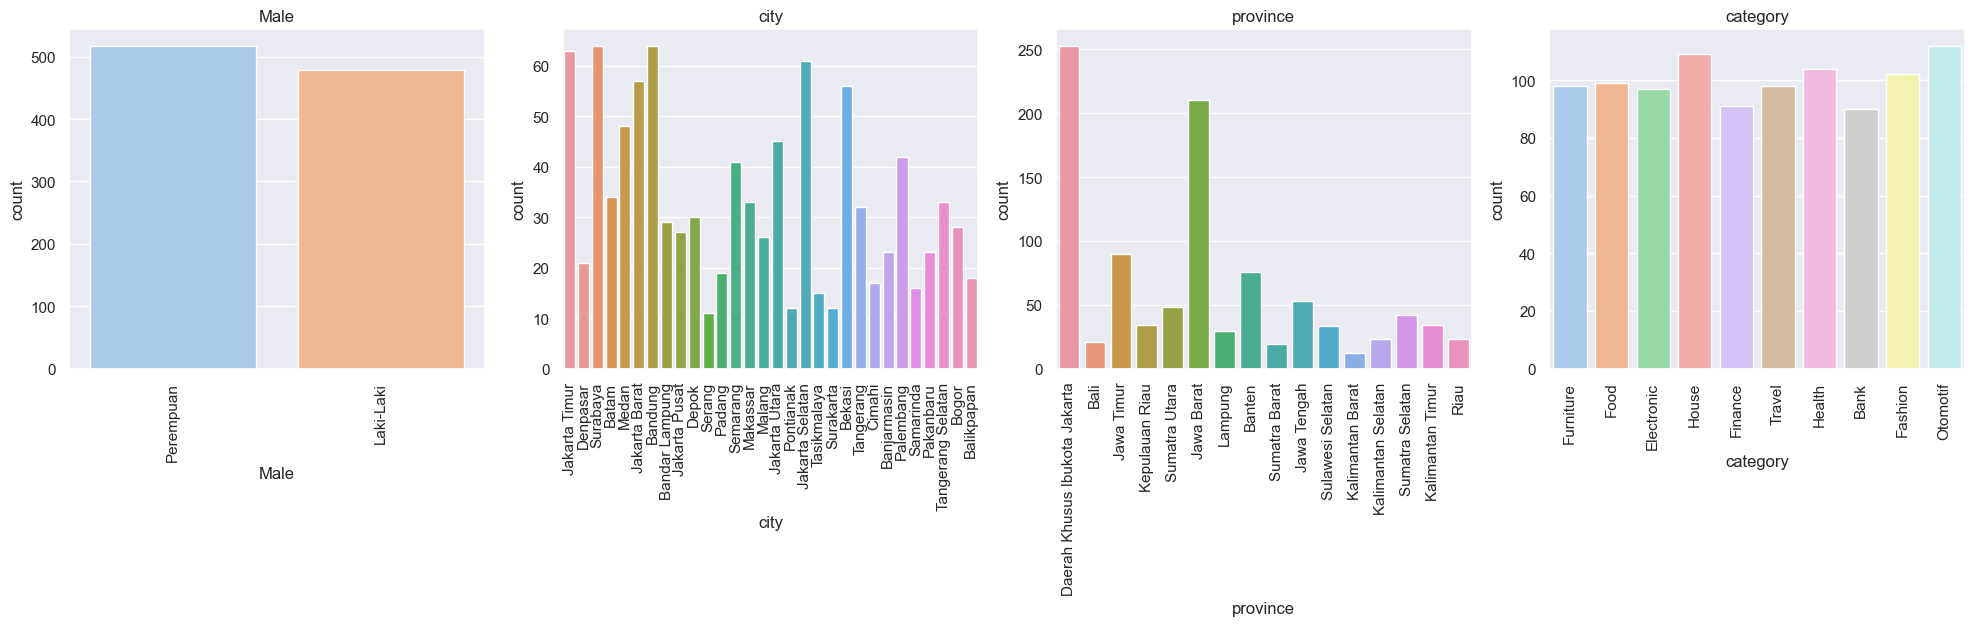

In [39]:
# let's show categorical features univariate visualization

cat = df[['Male','city','province','category']]

plt.figure(figsize=(20,10))
for i in range(len(cat.columns)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=cat.columns[i], data=df)
    plt.title(cat.columns[i])
    plt.tight_layout()
    plt.xticks(rotation=90)
    

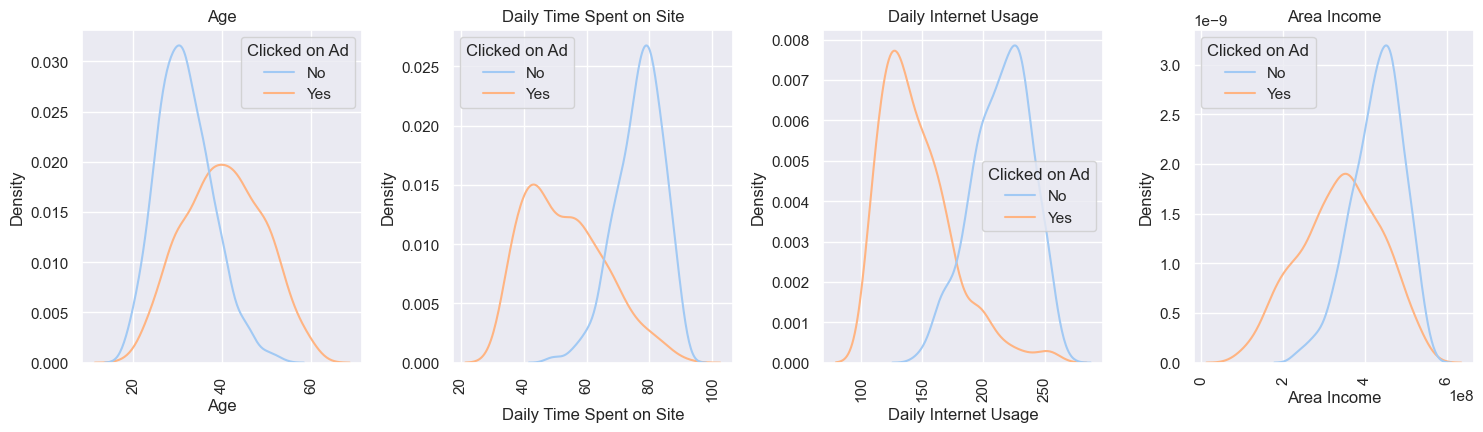

In [27]:
# let's show numerical features univariate visualization

num = ['Age','Daily Time Spent on Site','Daily Internet Usage','Area Income']

plt.figure(figsize=(15,8))
for i in range(0,len(num)):
    plt.subplot(2,4,i+1)
    sns.kdeplot(x=df[num[i]], data=df,hue=df['Clicked on Ad'])
    plt.title(num[i])
    plt.tight_layout()
    plt.xticks(rotation=90)

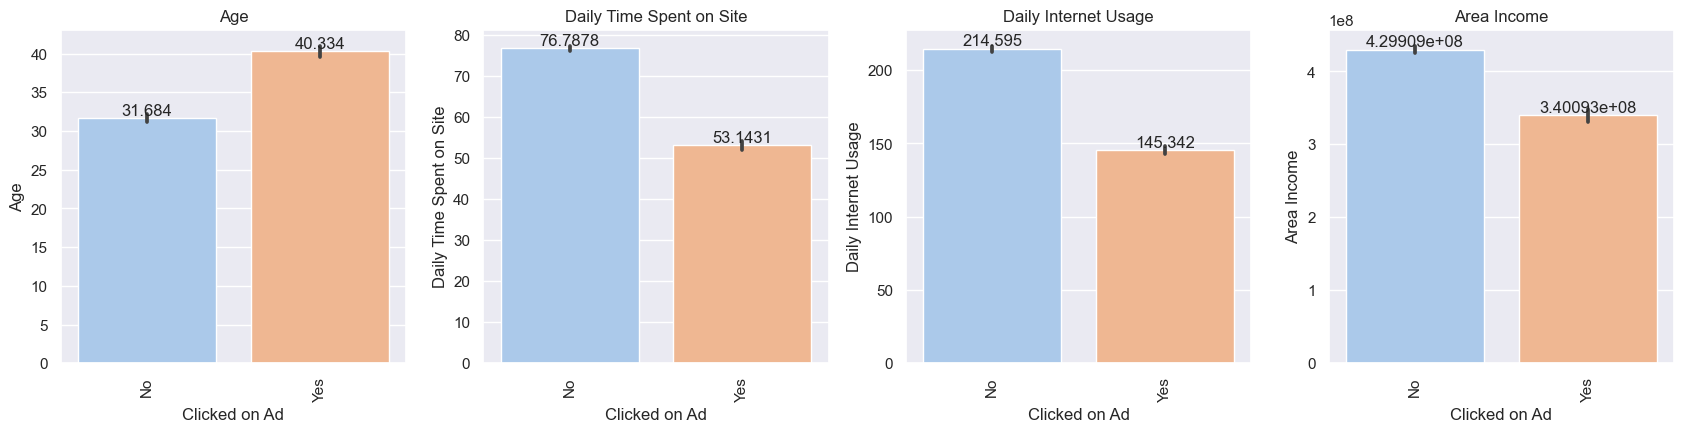

In [37]:
#let show bar plot for num features
plt.figure(figsize=(17,8))
for i in range(0,len(num)):
    plt.subplot(2,4,i+1)
    ax=sns.barplot(y=df[num[i]], x=df['Clicked on Ad'], data=df)
    plt.title(num[i])
    plt.tight_layout()
    plt.bar_label(ax.containers[0])

    plt.xticks(rotation=90)


### ***Bivariate Analysis***

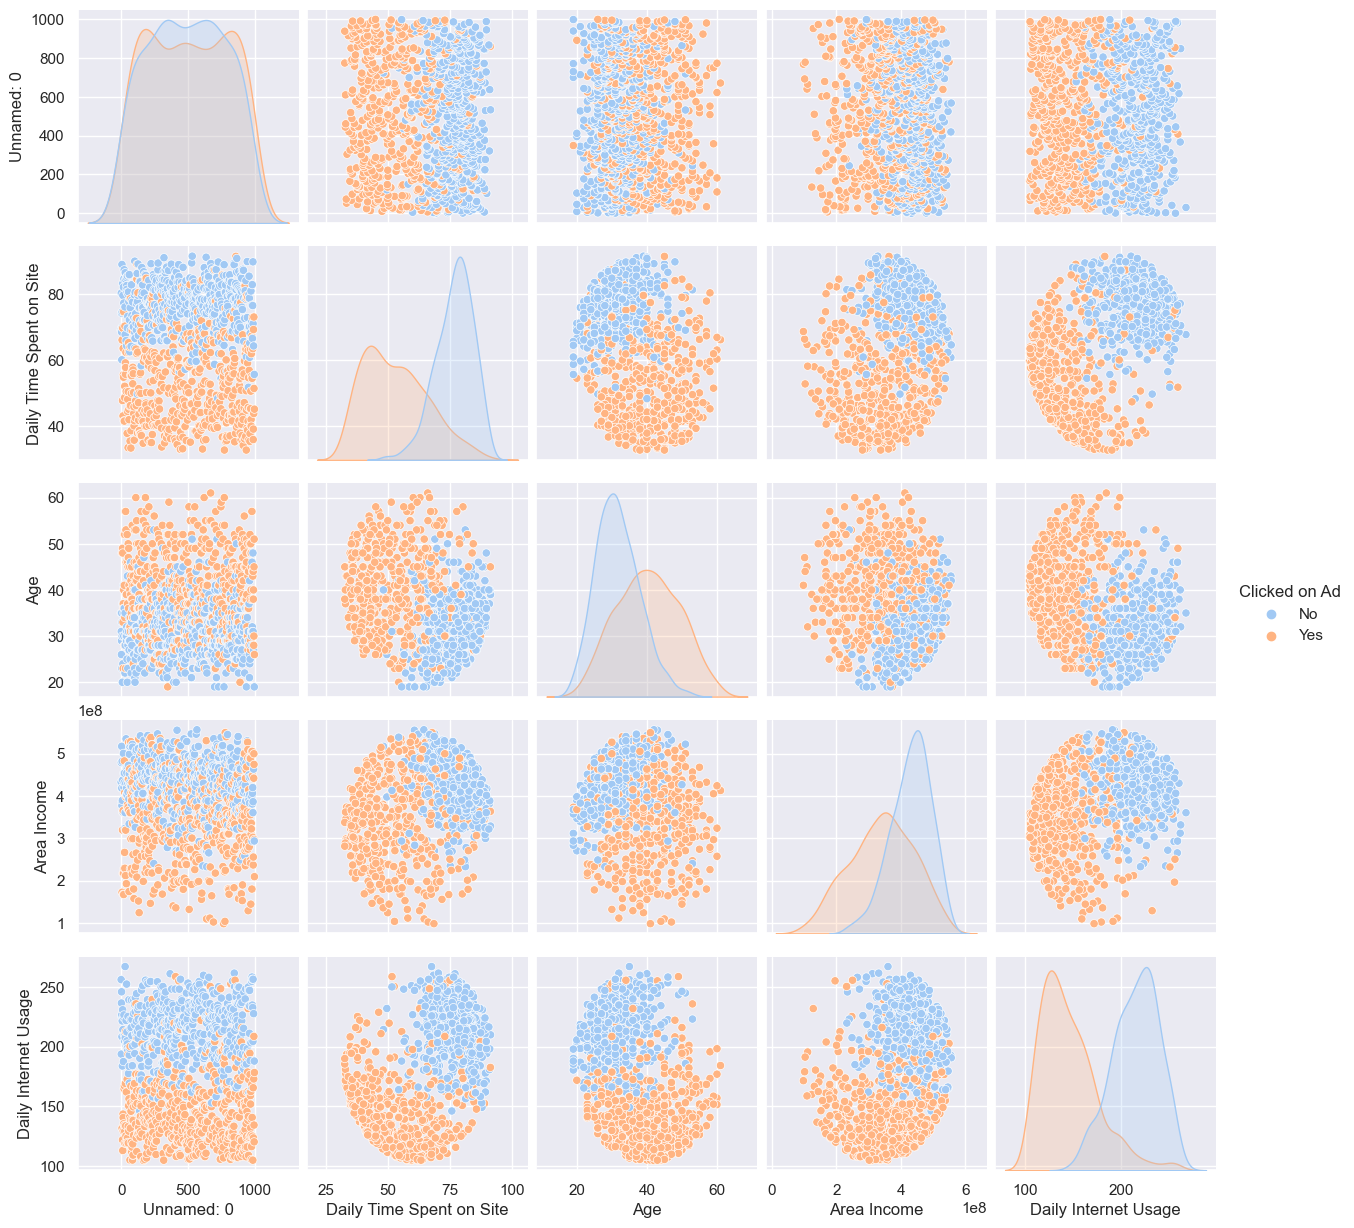

In [42]:
#let show bivariate analysis using pairplot
sns.pairplot(df, hue='Clicked on Ad')
